In [46]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

import hnn_core
import os.path as opx
import matplotlib.pyplot as plt
import time
import numpy as np
from hnn_core import jones_2009_model, simulate_dipole, read_params
from hnn_core.network_models import add_erp_drives_to_jones_model

In [47]:
def simulator(parameter_set):
    
    # net_sim = net.copy()
    net_sim = jones_2009_model()
    
    parameter_set1 = parameter_set[0]
    parameter_set2 = parameter_set[1]
    
    
    # your code here that updates "mu" or mean time of drives using parameter theta
    weights_ampa = {'L2_basket': 0.09, 'L2_pyramidal': 0.02, 
                'L5_basket': 0.2, 'L5_pyramidal': 8e-3}
    synaptic_delays = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                   'L5_basket': 1.0, 'L5_pyramidal': 1.0}

    net_sim.add_evoked_drive(name='evprox1', mu=parameter_set1, sigma=parameter_set2, numspikes=1,
                     weights_ampa=weights_ampa, location='proximal',
                     synaptic_delays=synaptic_delays)
    
    dpl = simulate_dipole(net_sim, dt=0.5, tstop=170) # , n_trials=2

    return dpl[0].data['agg']

### Step 1: sampling parameters from the prior ...

In [49]:
num_dim = 1
prior1 = utils.BoxUniform(low=20 * torch.ones(num_dim), high=160 * torch.ones(num_dim))
prior2 = utils.BoxUniform(low=0 * torch.ones(num_dim), high=30 * torch.ones(num_dim))

# prior = util.BoxUniform(low=[20, 0], high=[160, 30])

### Step 1: ... simulating synthetic datasets from these parameters

### Step 2: using a deep density estimation neural network to learn the (probabilistic) association between data (or data features) and underlying parameters, that is to learn statistical inference from simulated data.

SNPE

In [13]:
posterior = infer(simulator, (prior1, prior2), method="SNPE", num_simulations=10)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Running 10 simulations.:   0%|          | 0/10 [00:00<?, ?it/s]

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEUR

### Step 3: This density estimation network is then applied to empirical data to derive the full space of parameters consistent with the data and the prior, that is, the posterior distribution. High posterior probability is assigned to parameters which are consistent with both the data and the prior, low probability to inconsistent parameters.

In [52]:
# prior1 = utils.BoxUniform(low=20 * torch.ones(num_dim), high=160 * torch.ones(num_dim))
# prior2 = utils.BoxUniform(low=0 * torch.ones(num_dim), high=30 * torch.ones(num_dim))
observation = simulator((40, 15))

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


In [50]:
# observation = torch.zeros(341)
# # observation = torch.ones(341)
observation = np.random.random(341)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

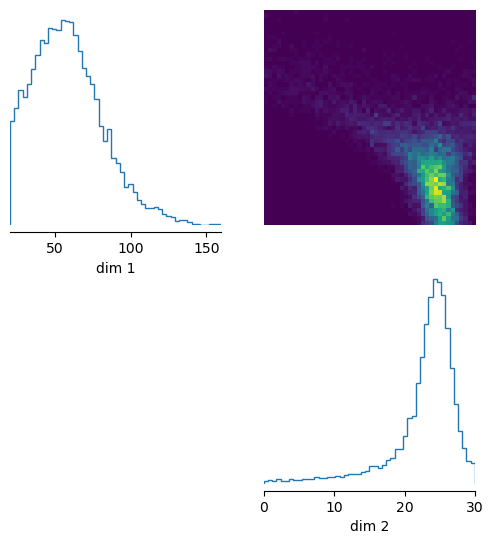

In [53]:
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[20, 160], [0, 30]], figsize=(6, 6))

In [55]:
theta = (40, 15)

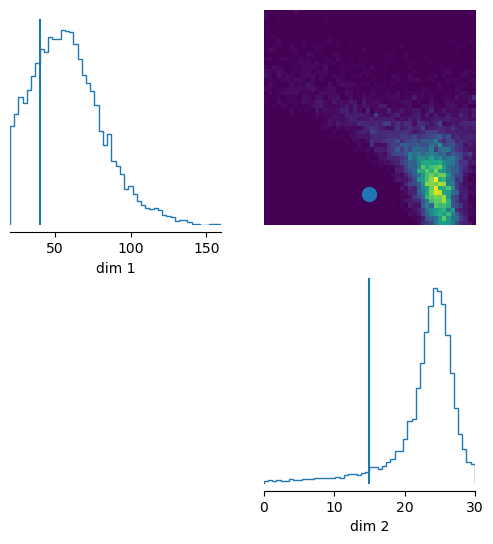

In [56]:
_ = analysis.pairplot(samples, limits=[[20, 160], [0, 30]], figsize=(6, 6), points=theta)

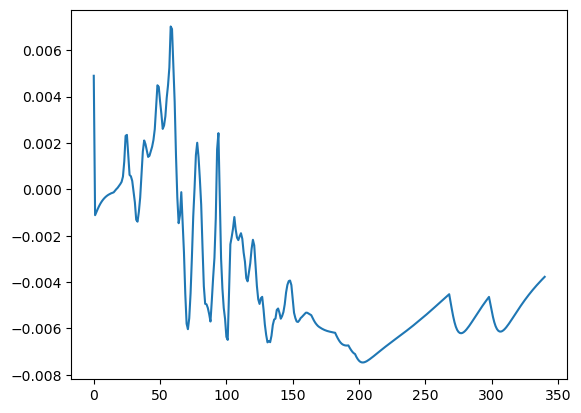

In [58]:
plt.plot(observation)

In [39]:
print(posterior)

Posterior conditional density p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


SNLE

In [10]:
posterior = infer(simulator, (prior1, prior2), method="SNLE", num_simulations=5)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Running 5 simulations.:   0%|          | 0/5 [00:00<?, ?it/s]

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEUR

In [11]:
samples = posterior.sample((100,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[20, 160], [0, 30]], figsize=(6, 6))

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

SNRE

In [12]:
posterior = infer(simulator, (prior1, prior2), method="SNRE", num_simulations=5)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Running 5 simulations.:   0%|          | 0/5 [00:00<?, ?it/s]

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEUR

Trial 1: 160.0 ms...


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [ ]:
samples = posterior.sample((100,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[20, 160], [0, 30]], figsize=(6, 6))

--------------